
 Dataset Information :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          1000 non-null   int64  
 1   Order ID        1000 non-null   object 
 2   Order Date      1000 non-null   object 
 3   Ship Date       1000 non-null   object 
 4   Ship Mode       1000 non-null   object 
 5   Customer ID     1000 non-null   object 
 6   Customer Name   1000 non-null   object 
 7   Segment         1000 non-null   object 
 8   Postal Code     194 non-null    float64
 9   City            1000 non-null   object 
 10  State           1000 non-null   object 
 11  Country         1000 non-null   object 
 12  Region          1000 non-null   object 
 13  Market          1000 non-null   object 
 14  Product ID      1000 non-null   object 
 15  Category        1000 non-null   object 
 16  Sub-Category    1000 non-null   object 
 17  Product Na

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,1000.000000,194.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,25079.328000,53966.170103,1710.971470,5.55800,0.092840,288.920440,272.384897
std,12897.726632,33734.306466,1259.239238,2.71846,0.148666,574.504782,176.160716
min,58.000000,2920.000000,1.910000,1.00000,0.000000,-3059.820000,1.070000
25%,15118.750000,19134.000000,826.907500,4.00000,0.000000,10.037500,209.827500
50%,25084.500000,60564.000000,1585.115000,5.00000,0.000000,190.685000,258.897500
75%,34524.000000,88187.500000,2477.812500,7.00000,0.150000,518.872500,351.070250
max,51284.000000,98198.000000,9892.740000,14.00000,0.800000,4946.370000,923.630000


Basic Statistics:
                Sales         Profit
mean    1.710971e+03     288.920440
median  1.585115e+03     190.685000
std     1.259239e+03     574.504782
var     1.585683e+06  330055.744491
Correlation Matrix:
                   Sales    Profit  Quantity  Discount  Shipping Cost
Sales          1.000000  0.533676  0.555691 -0.187997       0.644891
Profit         0.533676  1.000000  0.154481 -0.505190       0.290593
Quantity       0.555691  0.154481  1.000000  0.034045       0.356324
Discount      -0.187997 -0.505190  0.034045  1.000000      -0.169216
Shipping Cost  0.644891  0.290593  0.356324 -0.169216       1.000000


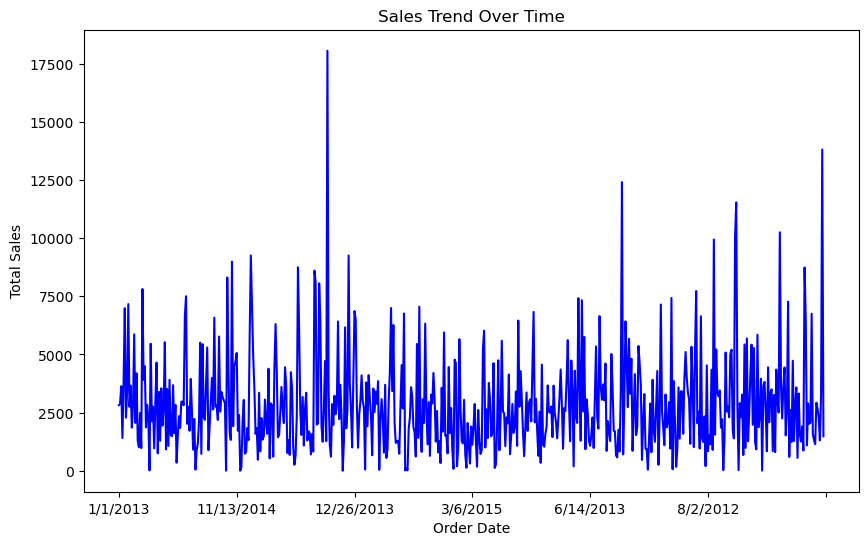

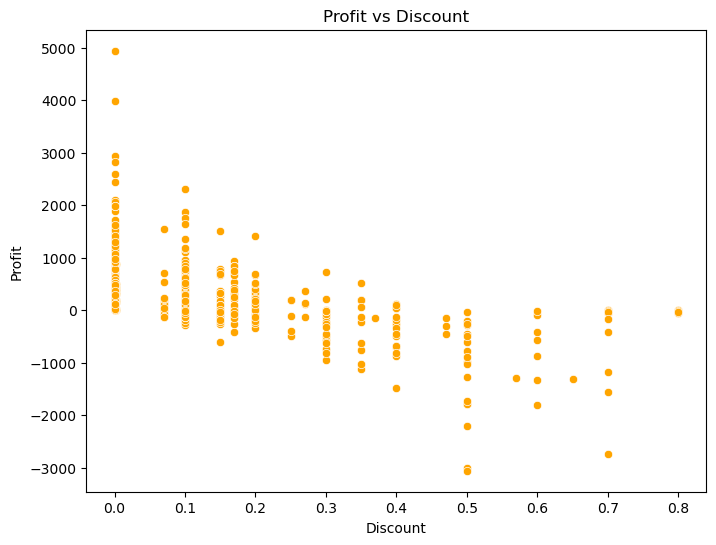

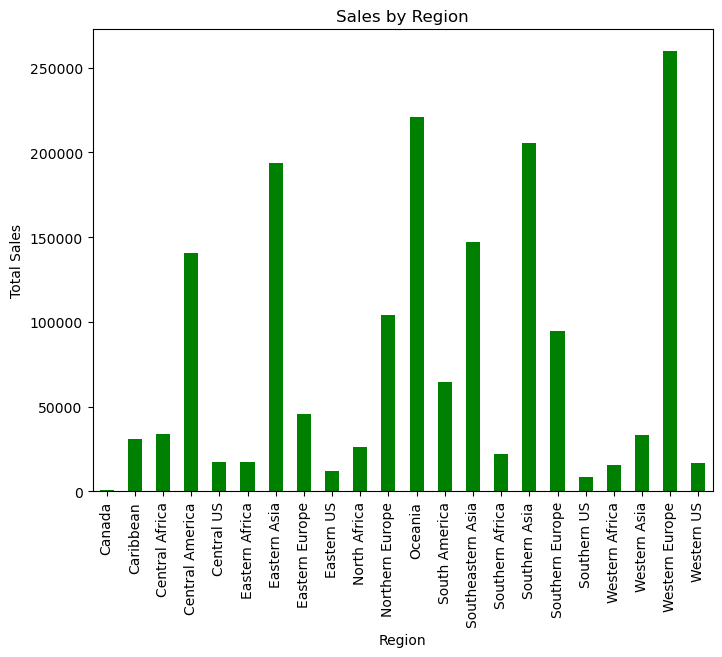

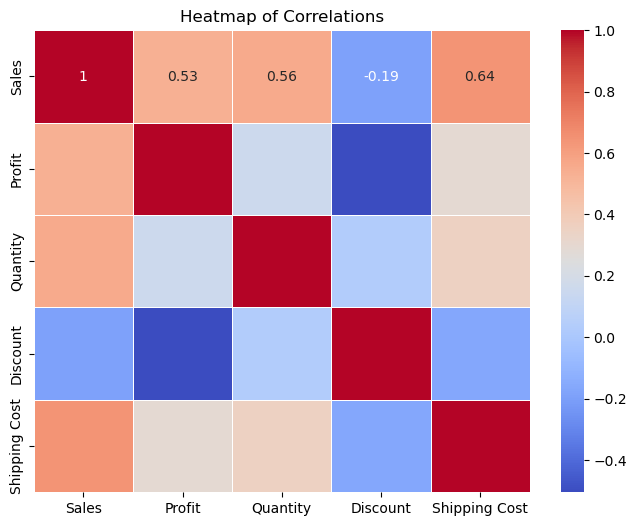

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset 
df = pd.read_csv('Global_Superstore(CSV).csv')

# 1. Clean Data

# Handle missing values: Remove columns with many missing values or fill with median/mean
data_cleaned = data.drop(columns=['Postal Code'])  # Dropping "Postal Code" with high missing values
#Basic Info
print("\n Dataset Information :")
df.info()

#statistical summary
print("\n Statistical Summary :")
display(df.describe())

# Remove duplicates
data_cleaned = data_cleaned.drop_duplicates()


# 2. Statistical Analysis

# Compute basic statistics: mean, median, std, variance
statistics = data_cleaned[['Sales', 'Profit']].agg(['mean', 'median', 'std', 'var'])
print("Basic Statistics:\n", statistics)

# Compute correlations between variables
correlation_matrix = data_cleaned[['Sales', 'Profit', 'Quantity', 'Discount', 'Shipping Cost']].corr()
print("Correlation Matrix:\n", correlation_matrix)

# 3. Data Visualization

# Plot sales trends over time
plt.figure(figsize=(10, 6))
df.groupby('Order Date')['Sales'].sum().plot(kind='line', color='blue')
plt.title('Sales Trend Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.show()

# Scatter plot: Profit vs Discount
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Discount', y='Profit', data=df, color='orange')
plt.title('Profit vs Discount')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

plt.figure(figsize=(8, 6))
region_sales = df.groupby('Region')['Sales'].sum()
region_sales.plot(kind='bar', color='green')
plt.title('Sales by Region')
plt.ylabel('Total Sales')
plt.show()

# Heatmap for correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlations')
plt.show()


Dataset Shape: (113036, 18)

Missing Values:
 Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

Data Types:
 Date                object
Day                  int64
Month               object
Year                 int64
Customer_Age         int64
Age_Group           object
Customer_Gender     object
Country             object
State               object
Product_Category    object
Sub_Category        object
Product             object
Order_Quantity       int64
Unit_Cost            int64
Unit_Price           int64
Profit               int64
Cost                 int64
Revenue              int64
dtype: object


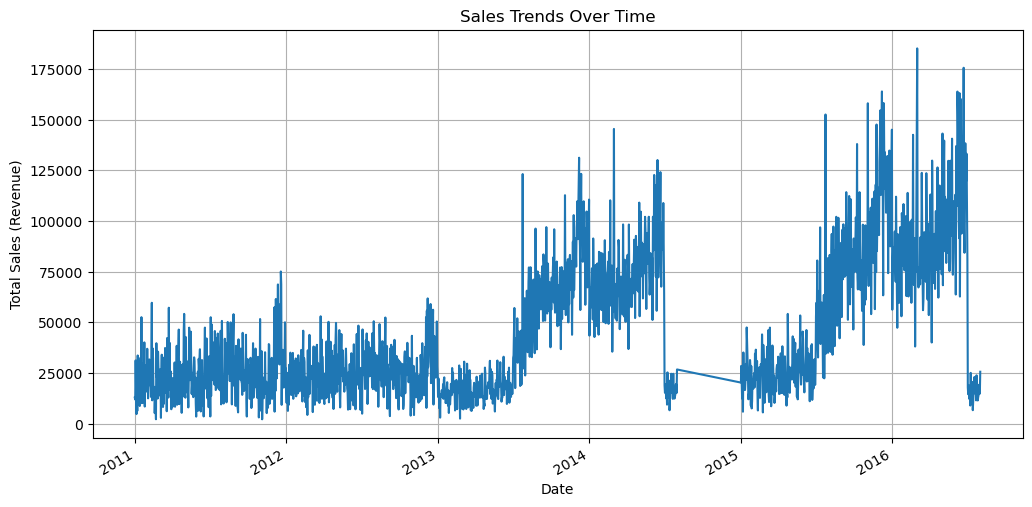

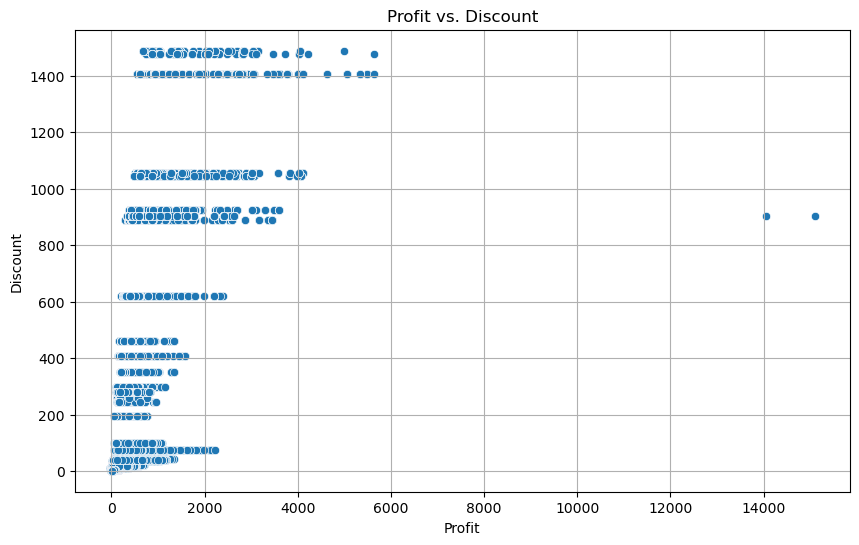

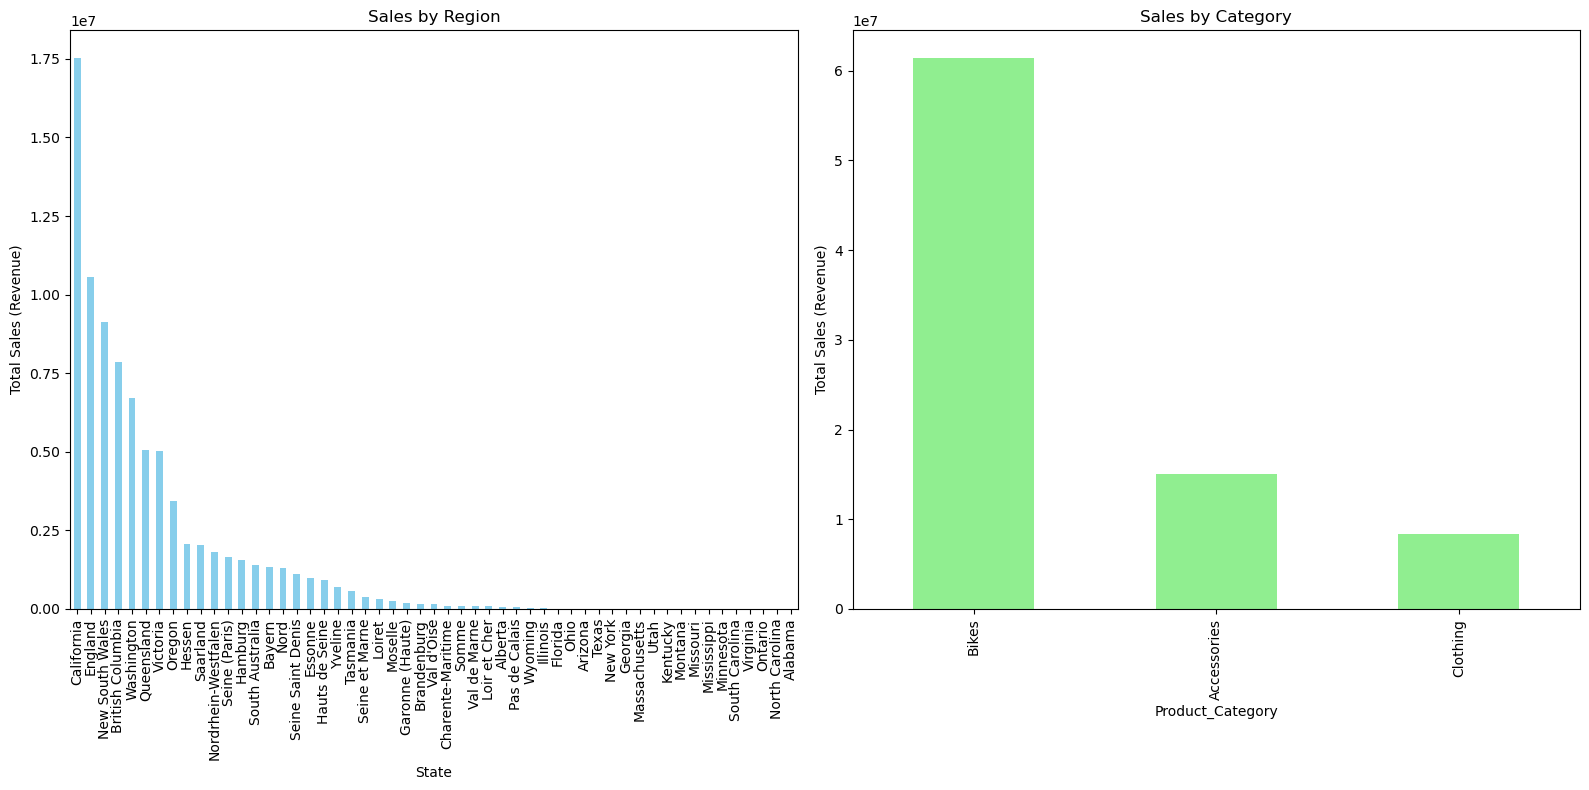

Model Evaluation Metrics:
R² Score: 0.9283136107144072
Mean Squared Error (MSE): 123793.80102798901


In [14]:
#task 2
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'sales_data.csv'  
sales_data = pd.read_csv(file_path)

# Inspect the dataset
print("Dataset Shape:", sales_data.shape)
print("\nMissing Values:\n", sales_data.isnull().sum())
print("\nData Types:\n", sales_data.dtypes)

# Data Cleaning
sales_data['Date'] = pd.to_datetime(sales_data['Date'], errors='coerce')
sales_data = sales_data.drop_duplicates()
sales_data['Discount'] = sales_data['Unit_Price'] - sales_data['Unit_Cost']

# Visualizations

# 1. Sales trends over time
plt.figure(figsize=(12, 6))
sales_data.groupby('Date')['Revenue'].sum().plot()
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales (Revenue)')
plt.grid()
plt.show()

# 2. Scatter plot showing Profit vs. Discount
plt.figure(figsize=(10, 6))
sns.scatterplot(x=sales_data['Profit'], y=sales_data['Discount'])
plt.title('Profit vs. Discount')
plt.xlabel('Profit')
plt.ylabel('Discount')
plt.grid()
plt.show()

# 3. Sales distribution by Region and Category
plt.figure(figsize=(16, 8))

# By Region
region_sales = sales_data.groupby('State')['Revenue'].sum().sort_values(ascending=False)
plt.subplot(1, 2, 1)
region_sales.plot(kind='bar', color='skyblue')
plt.title('Sales by Region')
plt.ylabel('Total Sales (Revenue)')

# By Category
category_sales = sales_data.groupby('Product_Category')['Revenue'].sum().sort_values(ascending=False)
plt.subplot(1, 2, 2)
category_sales.plot(kind='bar', color='lightgreen')
plt.title('Sales by Category')
plt.ylabel('Total Sales (Revenue)')

plt.tight_layout()
plt.show()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
X = sales_data[['Profit', 'Discount']]  # Features
y = sales_data['Revenue']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print model evaluation metrics
print("Model Evaluation Metrics:")
print(f"R² Score: {r2}")
print(f"Mean Squared Error (MSE): {mse}")